In [ ]:
!pip install langgraph


In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [ ]:
class State(TypedDict):
   nlist: List[str]
   another_string: str

In [ ]:
def node_a(state: State) -> State:
    #print(f"node is receiving {state['nlist'],['another_string']}")
    note = "Hello world from node a "
    return(State(nlist = [note]))

In [ ]:
builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_edge(START, "a")
builder.add_edge("a", END)
graph = builder.compile()

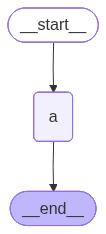

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
#print(graph.get_graph().draw_mermaid())

In [ ]:
initial_state = State(
    nlist = ["Hello node a "],
    another_string = "iam pradeep"
)
graph.invoke(initial_state)

{'nlist': ['Hello world from node a '], 'another_string': 'iam pradeep'}

Parallel execution


In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [ ]:
class State(TypedDict):
  nlist: Annotated[List[str], operator.add]

In [ ]:
def node_a(state: State) -> State:
    print(f"Adding 'A' to {state['nlist']}")
    return(State(nlist = ["A"]))

def node_b(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return(State(nlist = ["B"]))

def node_c(state: State) -> State:
    print(f"Adding 'c' to {state['nlist']}")
    return(State(nlist = ["c"]))

def node_bb(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return(State(nlist = ["BB"]))

def node_cc(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return(State(nlist = ["CC"]))

def node_d(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return(State(nlist = ["D"]))


In [ ]:
builder = StateGraph(State)


builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("bb", node_bb)
builder.add_node("cc", node_cc)
builder.add_node("d", node_d) # Add node 'd' here

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "bb")
builder.add_edge("c", "cc")
builder.add_edge("bb", "d")
builder.add_edge("cc", "d")
builder.add_edge("d", END)

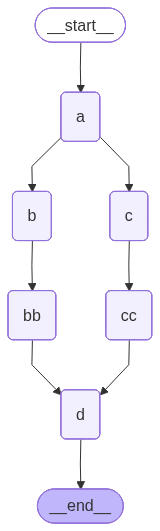

In [ ]:
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
initial_state = State(
    nlist = ["Initial String:"]
)
graph.invoke(initial_state)

Adding 'A' to ['Initial String:']
Adding 'B' to ['Initial String:', 'A']
Adding 'c' to ['Initial String:', 'A']
Adding 'B' to ['Initial String:', 'A', 'B', 'c']
Adding 'B' to ['Initial String:', 'A', 'B', 'c']
Adding 'B' to ['Initial String:', 'A', 'B', 'c', 'BB', 'CC']


{'nlist': ['Initial String:', 'A', 'B', 'c', 'BB', 'CC', 'D']}

    CONDITIONAL EDGES
    

In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [ ]:
class State(TypedDict):
  nlist: Annotated[List[str], operator.add]

In [ ]:

def node_a(state: State) -> Command [Literal["b", "c", END]]:
    select = state["nlist"][-1]
    if select == "b":
        next_node = "b"
    elif select == "c":
        next_node ="c"
    elif select == "d":
        next_node = END
    else:
        next_node = END

    return Command(
        update = State(nlist = [select]),
        goto = [next_node]
    )

def node_b(state: State) -> State:
    return(State(nlist = ["B"]))

def node_c(state: State) -> State:
    return(State(nlist = ["C"]))

In [ ]:
#def conditional_edge(state: State) -> Literal["b", "c", END]:
  #select = state["nlist"][-1]
  ## return "b"
 # elif select == "c":
#    return "c"
  #elif select == "d":
   # return END
  #else:
   # return END

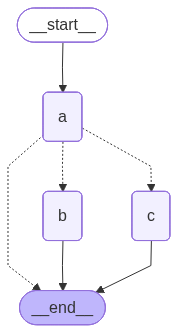

In [ ]:
builder = StateGraph(State)


builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)

builder.add_edge(START, "a")
builder.add_edge("b", END)
builder.add_edge("c", END)
#builder.add_conditional_edges("a", conditional_edge)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
user = input('b, c, or d to quit:')
input_state = State(
    nlist = [user]
    )
graph.invoke(input_state)

In [ ]:
'''while True:
  user = input('b, c, or d to quit:')
  print(user)
  input_state = State(nlist = [user])
  result = graph.invoke(input_state)
  print(result)
  if result['nlist'][-1] == "d":
    print("quit")
    break'''

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver
memory = InMemorySaver()
config = {"configurable": {"thread_id": "1"}}

In [ ]:
graph = builder.compile(checkpointer=memory)

In [ ]:
while True:
  user = input('b, c, or d to quit:')
  print(user)
  input_state = State(nlist = [user])
  result = graph.invoke(input_state, config=config)
  print(result)
  if result['nlist'][-1] == "d":
    print("quit")
    break

  INTERRUPTS
  

In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

memory = InMemorySaver()
config = {"configurable": {"thread_id": "1"}}

In [ ]:
class State(TypedDict):
  nlist: Annotated[List[str], operator.add]

In [ ]:
from re import A
def node_a(state: State) -> Command [Literal["b", "c", END]]:
  print("Entered 'a' node")
  select = state["nlist"][-1]
  if select == "b":
    next_node = "b"
  elif select == "c":
    next_node = "c"
  elif select == "d":
    next_node = END
  else:
    admin = interrupt(f"Unexpected input: '{select}'")
    print(admin)
    if admin == "continue":
        next_node = "b"
    else:
        next_node = END
        select = "q"

  return Command(
      update = State(nlist = [select]),
      goto = next_node
  )


def node_b (state:State) -> State:
    return(State(nlist = ["B"]))

def node_c (state: State) -> State:
    return(State(nlist = ["C"]))

In [ ]:
builder = StateGraph(State)

builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)


builder.add_edge(START, "a")
builder.add_edge("b", END)
builder.add_edge("c", END)


graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
while True:
  user = input('b, c, or d to quit: ')
  input = graph.invoke(input_state, config)


  if' __interrupt__' in result:
    print(f"Interrupt:{result}")
    msg = result['__interrupt__'][-1].value
    print(msg)
    human = input(f"\n{msg}: ")

    human_response = Command(
        resume = human
    )
    result = graph.invoke(human_response, config  )


  if result['nlist'][-1] == "d":
    print("quit")
    break